# Review 3 Key
by **Professor Throckmorton**  
for *Time Series Econometrics*  
W&amp;M ECON 408/PUBP 616  
<a href="review-3.slides.html">Slides</a>

## True or False

1. In a state space model, the observation equation expresses observed variables as functions of unobserved states and possibly exogenous inputs, plus noise.
2. The state vector in a time-varying CAPM model estimated using a state space approach includes both the intercept $\alpha_t$ and the slope $\beta_t$, which are assumed to follow random walks.
3. The Kalman filter estimates current states using all available data, including future observations.
4. The Kalman filter can estimate non-linear and non-Gaussian state space models without modification.
5. The HP filter penalizes large deviations of the trend component from the original data but allows sharp changes in the slope of the trend when $\lambda$ is small.


**Answers:**

1. True
2. True
3. False because only smoothing uses all available data.
4. False because the Kalman filter works for linear observation and state equations where the residuals are Gaussian.
5. True

## Multiple Choice

Which of the following correctly describes the general structure of a linear Gaussian state space model?

A. $x_t = Z_t x_{t-1} + \varepsilon_t, \quad y_t = F_t x_t + \eta_t$  
B. $y_t = c_t + F_t x_t + \eta_t, \quad x_t = d_t + Z_t x_t + \varepsilon_t$  
**C.** $x_t = c_t + F_t x_{t-1} + D_t u_t + \eta_t, \quad y_t = d_t + Z_t x_t + B_t u_t + \varepsilon_t$  
D. $x_t = F_t x_{t-1} + H_t y_t + \eta_t, \quad y_t = Z_t y_{t-1} + \varepsilon_t$

What is the correct sequence of steps performed by the Kalman filter at each time point?

A. Predict the next observation, update with new data, and then smooth using future observations.  
**B.** Predict the state using the previous estimate, update it with the current observation, then repeat the process.  
C. Update the state with current data, forecast future data, and then wait for future observations to revise the estimate.  
D. Smooth the full state path, update the current estimate, then forecast the measurement error.  

Which of the following best describes how the Kalman filter updates its estimate of the hidden state?

**A.** It combines a prior prediction of the state with the new observation to produce an updated estimate.  
B. It uses only the current observation to update the state, ignoring past estimates.  
C. It forecasts the next observation, then updates the state using future data once it becomes available.  
D. It replaces the prior state estimate entirely with the most recent observation.

Why can the Real Business Cycle (RBC) model be written as a state space model?

A. Because it includes regime-switching behavior and time-varying variances in all structural equations.  
B. Because it models only observable variables and has no latent structure.  
C. Because it is solved using backward-looking expectations and deterministic simulations.  
**D.** Because it expresses the dynamics of unobserved state variables (like productivity) and relates them to observable variables (like output and consumption).  

How is the Kalman filter used in the estimation of a linearized Real Business Cycle (RBC) model?

A. It estimates the deterministic steady state path of all model variables by smoothing over time.  
B. It recursively updates forecasts of observable variables by regressing them on lagged values.  
**C.** It estimates the likelihood of observed data by filtering the unobserved states implied by the linearized model.  
D. It generates simulated moments to match with analogous moments in the data using simulated method of moments (SMM).  

## State Space Model

Let $y_t$ be an observed time series (e.g. real GDP, CPI, or unemployment rate):

- **Observation equation:**

  $$
  y_t = \mu_t + \varepsilon_t, \quad \varepsilon_t \sim \mathcal{N}(0, \sigma_\varepsilon^2)
  $$
  
- **State (transition) equation:**

  $$
  \mu_t = \mu_{t-1} + \eta_t, \quad \eta_t \sim \mathcal{N}(0, \sigma_\eta^2)
  $$

- This state space model is known as the local level model or "random walk plus noise" model.

- The idea is that $\mu_t$ models the unobserved stochastic trend in the time series, while $\varepsilon_t$ would represent the cyclical component.

- Simulate a time series from this model where $\sigma_\varepsilon = 1$ and $\sigma_\eta = 0.1$ and use `statsmodels` to estimate the local-level model.

In [1]:
# Scientific computing
import numpy as np
# Assign parameters
T = 501; sigeps = 1; sigeta = 0.1;
# Draw random numbers
rng = np.random.default_rng(seed=42)
eps = rng.standard_normal(T)
eta = rng.standard_normal(T)
# Simulate time series
y = np.zeros([T,1])
mu = np.zeros([T,1])
for t in range(2,T):
    mu[t] = mu[t-1] + sigeta*eta[t]
    y[t] = mu[t] + sigeps*eps[t]

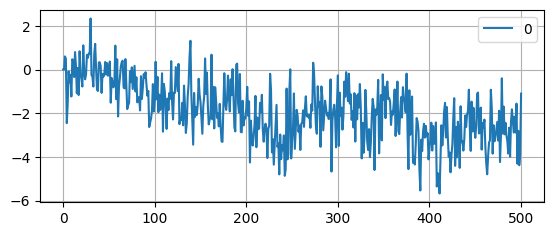

In [2]:
# Data analysis
import pandas as pd
# Convert to DataFrame and plot
df = pd.DataFrame(y)
df.plot(grid=True,figsize=(6.5,2.5));

In [14]:
import statsmodels.tsa.statespace.structural as sm
# Define local level model (random walk + noise)
mod = sm.UnobservedComponents(y, level='local level')
# Results
results = mod.fit()
tables = results.summary().tables
# Print summary tables
#for _, tab in enumerate(tables):
#    print(tab.as_html())

C:\Users\rabbitrun\miniconda3\Lib\site-packages\statsmodels\tsa\filters\hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


<table class="simpletable">
<caption>Unobserved Components Results</caption>
<tr>
  <th>Dep. Variable:</th>           <td>y</td>        <th>  No. Observations:  </th>    <td>501</td>  
</tr>
<tr>
  <th>Model:</th>              <td>local level</td>   <th>  Log Likelihood     </th> <td>-721.407</td>
</tr>
</table>
<table class="simpletable">
<tr>
          <td></td>            <th>coef</th>     <th>std err</th>      <th>z</th>      <th>P>|z|</th>  <th>[0.025</th>    <th>0.975]</th>  
</tr>
<tr>
  <th>sigma2.irregular</th> <td>    0.9145</td> <td>    0.062</td> <td>   14.785</td> <td> 0.000</td> <td>    0.793</td> <td>    1.036</td>
</tr>
<tr>
  <th>sigma2.level</th>     <td>    0.0165</td> <td>    0.006</td> <td>    2.786</td> <td> 0.005</td> <td>    0.005</td> <td>    0.028</td>
</tr>
</table>